In [1]:
%matplotlib inline
import sys
sys.path.insert(1,'../Utilities')
# notebook
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
import networkx as nx
from math import sin, cos, sqrt, atan2, radians
from utils import *
from data import *
from resObsMeta import *
#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [2]:
G,M = buildObsResMetaNetwork()
len(G.nodes())

../Utilities\resObsMeta.py:6: DtypeWarning: Columns (9,22) have mixed types. Specify dtype option on import or set low_memory=False.
  observationsKeyedOnRecorder = getIntersectionBetweenNBNAndNames()


First 15 nodes are group 1


218

In [3]:
print(M.shape)

(15, 203)


In [4]:
saveGraphToFile(G,"resObsAnalysis.txt")
np.savetxt("edgeCovTest.txt",M)

(218, 218)



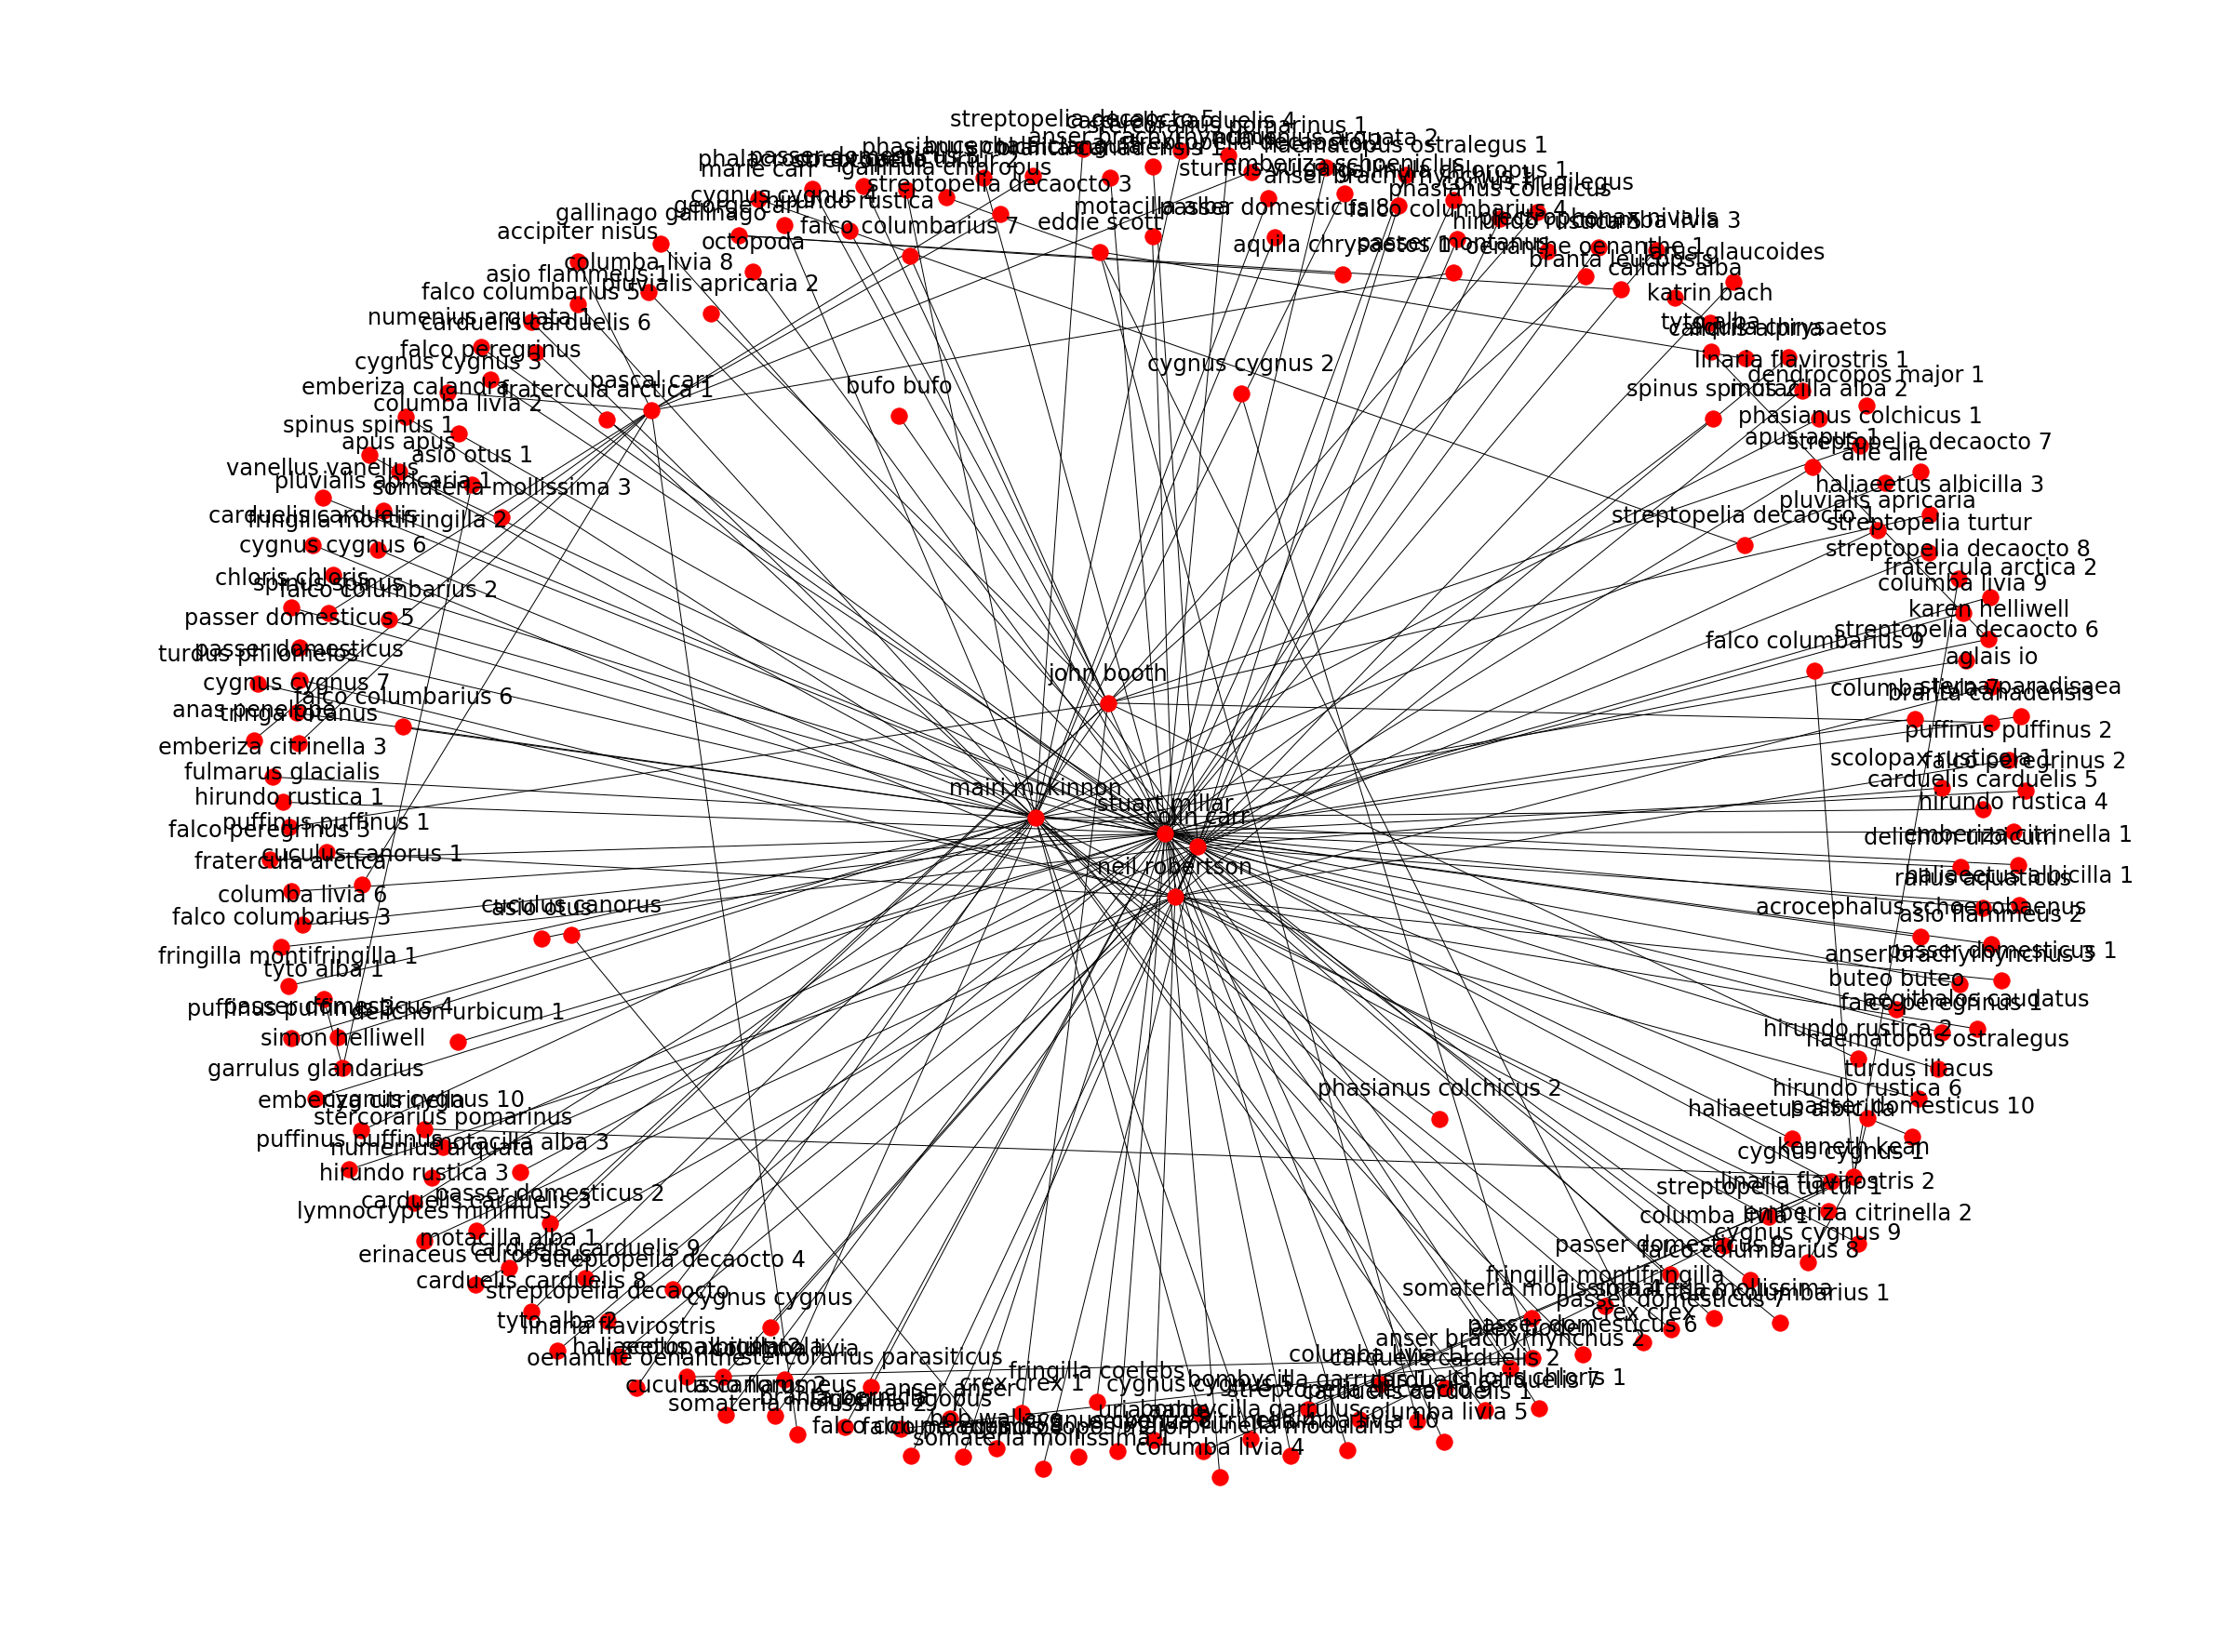

In [7]:
pos=nx.spring_layout(G,k=1)
nx.draw(G,pos)
for label in pos:
    x,y = pos[label]
    plt.text(x,y+0.035,s=label,horizontalalignment='center',fontsize=24)


15 203


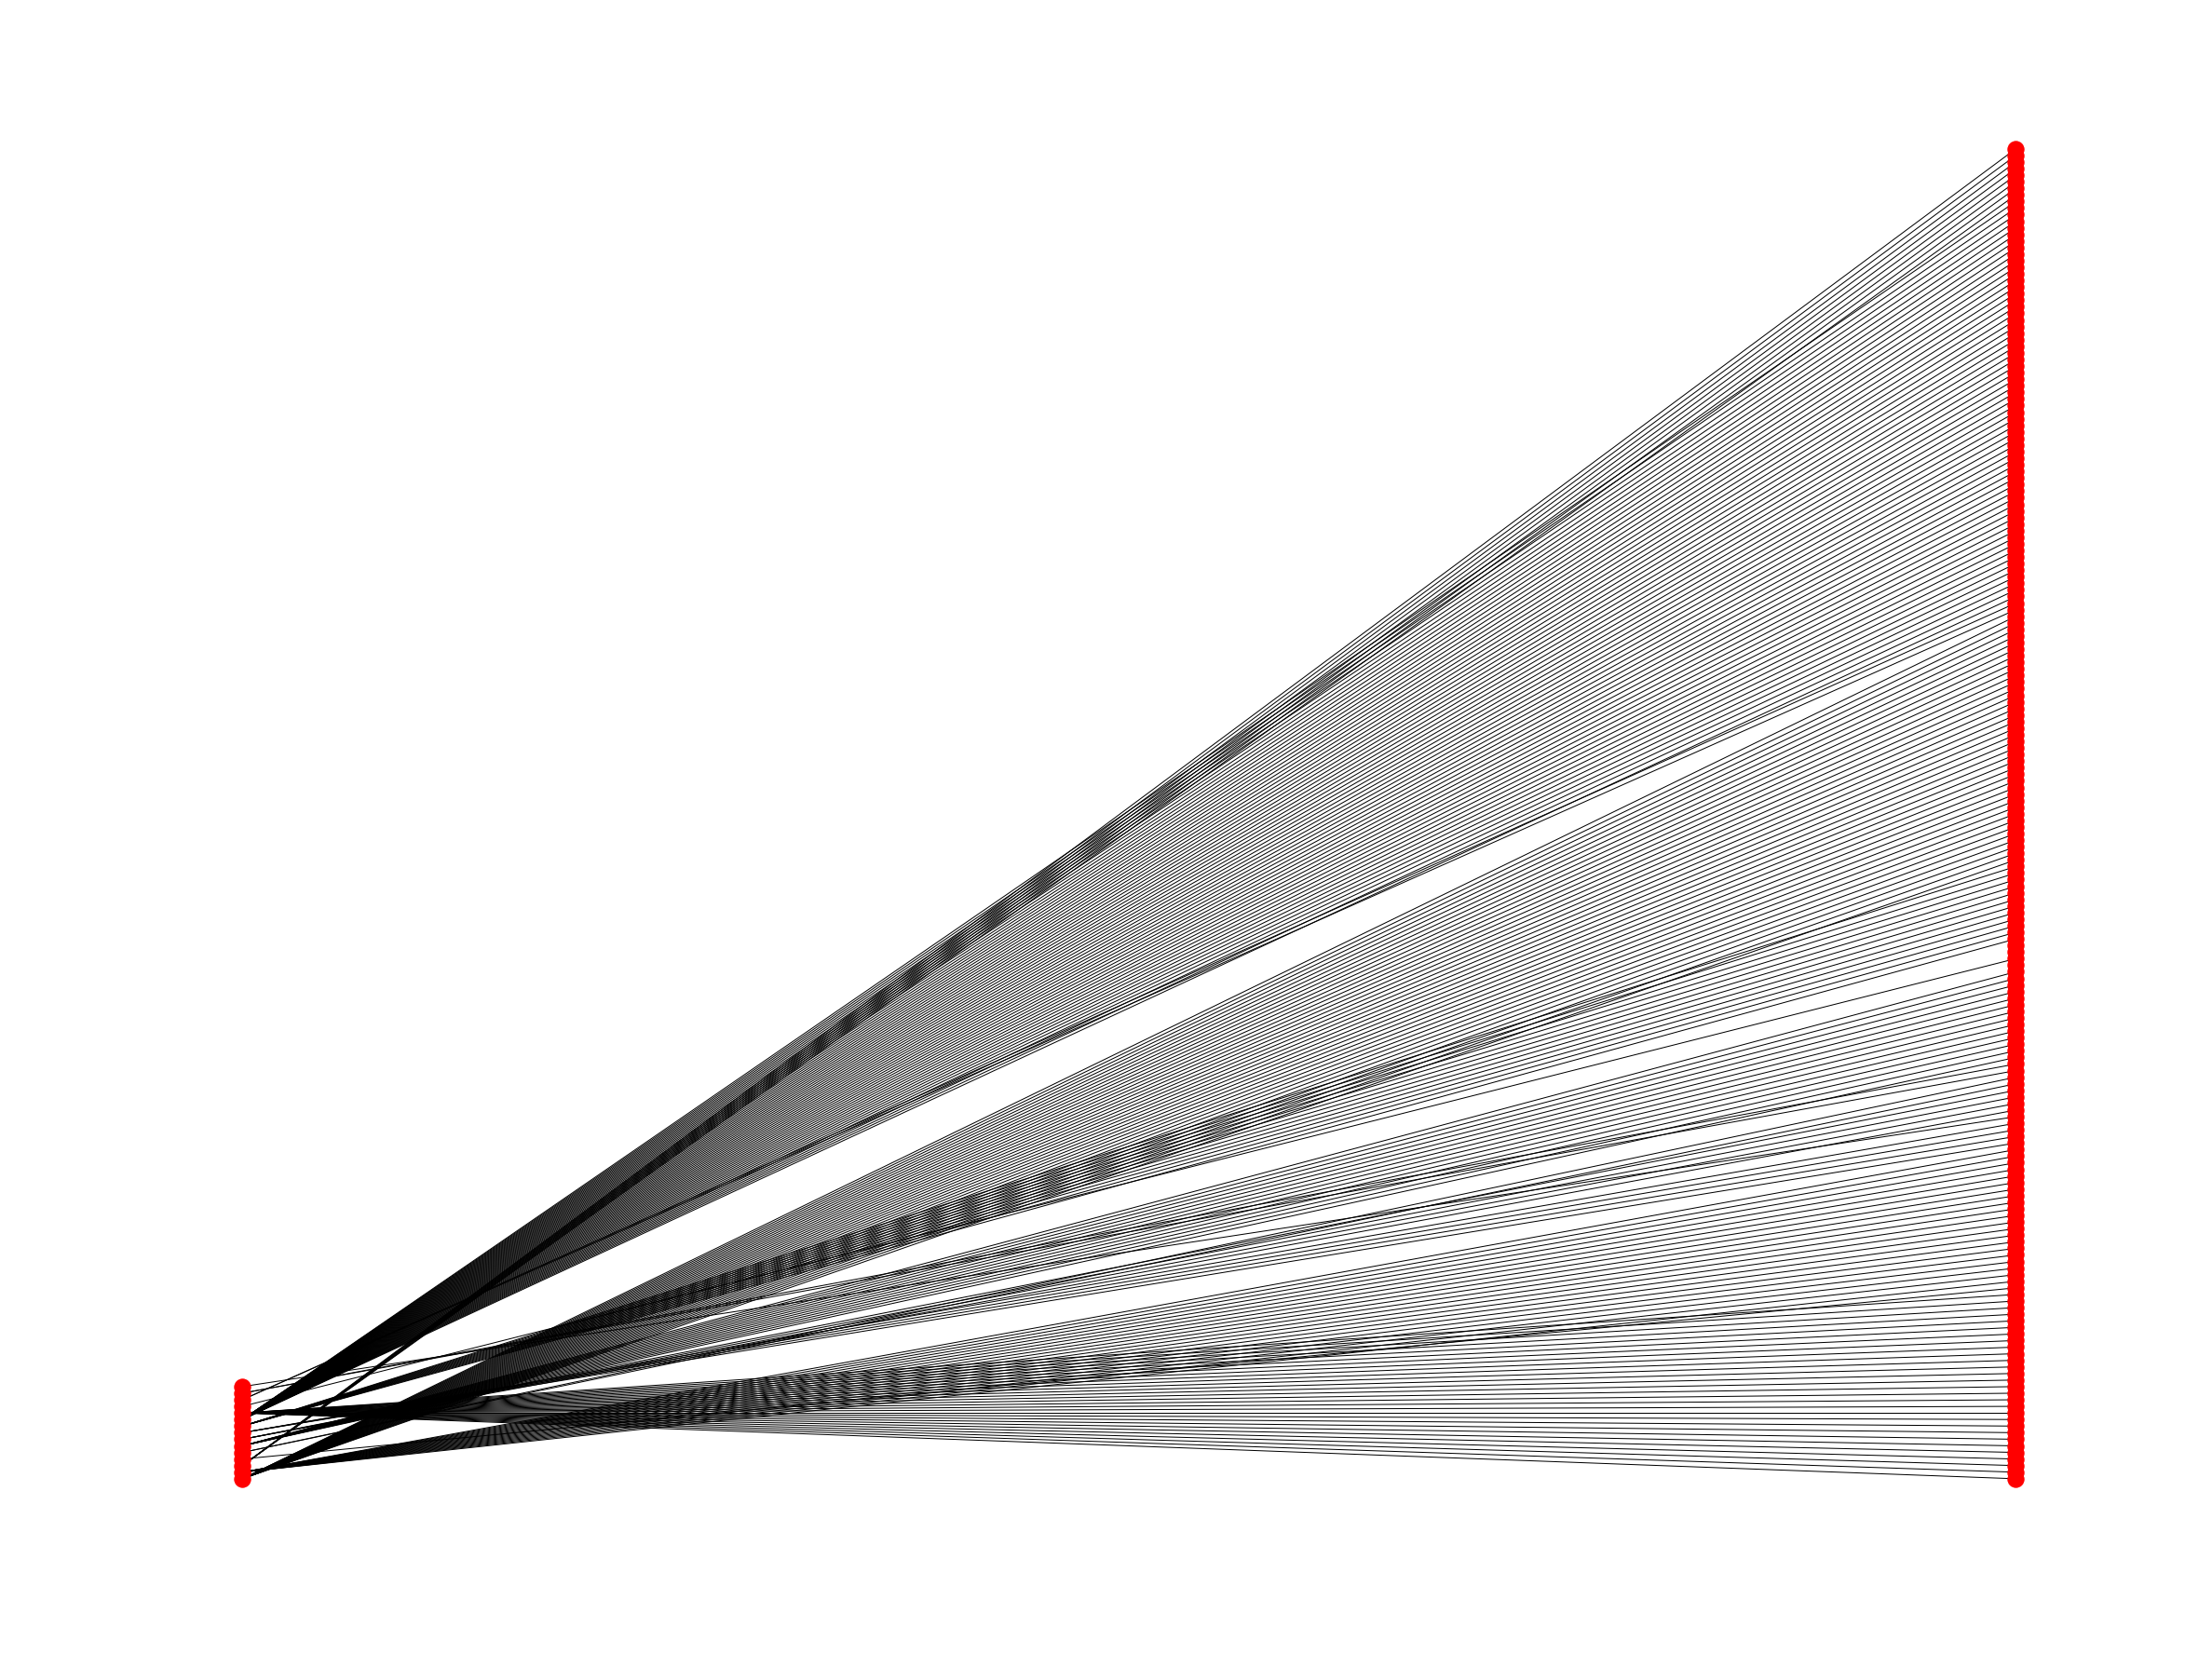

In [43]:
B = nx.Graph()

people = (list(G.nodes()))[:15]
animals = (list(G.nodes()))[15:]
print(len(people),len(animals))
B.add_nodes_from(people, bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from(animals, bipartite=1)
B.add_edges_from(list(G.edges()))

# Separate by group
l = list(G.nodes())[:15]
r = list(G.nodes())[15:]
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nx.draw(B, pos=pos)
plt.show()